In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df=pd.read_csv('forest_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [42]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [43]:
#droping columns
df.drop(['day','month','year'],axis=1,inplace=True)


In [44]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [45]:
df['Classes'].value_counts()


Classes
fire             131
not fire          99
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [46]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [47]:
df['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In [58]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [59]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
236,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
237,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
238,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
239,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [60]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
236    6.5
237    0.0
238    0.2
239    0.7
240    0.5
Name: FWI, Length: 241, dtype: float64

In [61]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [62]:
X_train.shape,X_test.shape

((180, 11), (61, 11))

In [63]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658884,-0.283527,-0.329838,0.695701,0.490708,0.368994,0.609129,0.461458,0.529054,0.254575
RH,-0.658884,1.000000,0.255366,0.218938,-0.636912,-0.383872,-0.201891,-0.687823,-0.330053,-0.429008,-0.388707
Ws,-0.283527,0.255366,1.000000,0.315301,-0.191422,-0.012974,0.078715,0.009717,0.020902,-0.088843,-0.199183
Rain,-0.329838,0.218938,0.315301,1.000000,-0.532895,-0.266456,-0.284452,-0.324347,-0.277710,-0.343453,-0.104973
FFMC,0.695701,-0.636912,-0.191422,-0.532895,1.000000,0.598514,0.504184,0.733343,0.584447,0.763900,0.266560
DMC,0.490708,-0.383872,-0.012974,-0.266456,0.598514,1.000000,0.878344,0.665321,0.984121,0.589805,0.207122
DC,0.368994,-0.201891,0.078715,-0.284452,0.504184,0.878344,1.000000,0.508745,0.947259,0.502396,-0.084035
ISI,0.609129,-0.687823,0.009717,-0.324347,0.733343,0.665321,0.508745,1.000000,0.628279,0.727029,0.282773
BUI,0.461458,-0.330053,0.020902,-0.277710,0.584447,0.984121,0.947259,0.628279,1.000000,0.578800,0.104204
Classes,0.529054,-0.429008,-0.088843,-0.343453,0.763900,0.589805,0.502396,0.727029,0.578800,1.000000,0.203781


<Axes: >

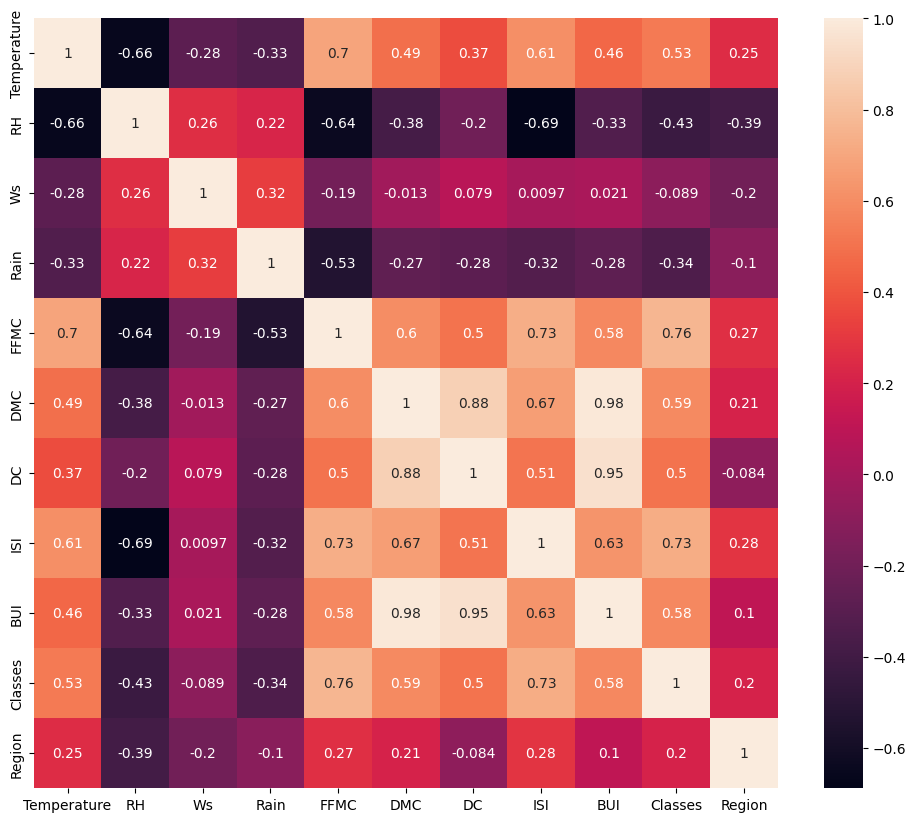

In [64]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [65]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [67]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((180, 9), (61, 9))

# Feature Scaling Or Standardization

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [69]:
X_train_scaled

array([[-0.82582663,  0.76875417,  1.25919129, ..., -0.62417554,
        -1.11803399, -0.97801929],
       [-0.03373714, -0.48680422, -0.57458243, ...,  0.06950049,
         0.89442719,  1.02247472],
       [ 2.07850149, -2.07277271, -0.20782769, ...,  2.84420462,
         0.89442719,  1.02247472],
       ...,
       [-1.88194595,  0.90091821,  0.5256818 , ..., -1.07865294,
        -1.11803399, -0.97801929],
       [ 1.286412  , -0.48680422, -0.20782769, ...,  0.85885598,
         0.89442719,  1.02247472],
       [-0.5617968 ,  0.96700023,  1.99270077, ..., -0.86337417,
        -1.11803399, -0.97801929]])

# Box Plots To understand Effect Of Standard Scaler

C:\Users\hp\AppData\Local\Temp\ipykernel_23104\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

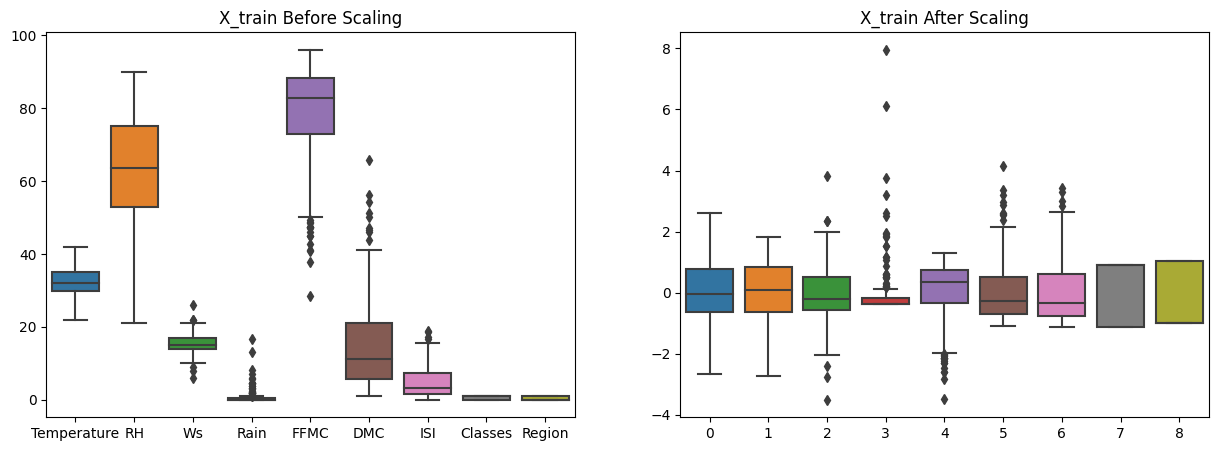

In [71]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

Mean absolute error 0.6612623700751249
R2 Score 0.9836843464471655


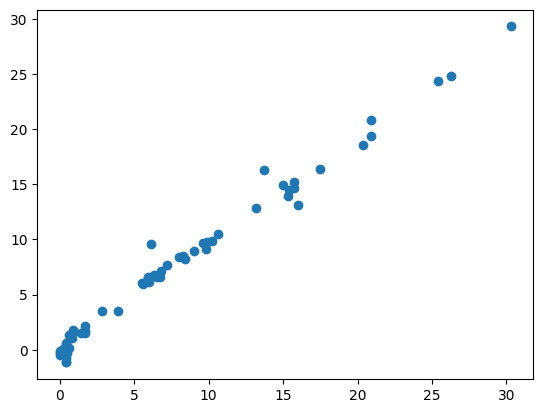

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Lasso Regression

Mean absolute error 1.2522655115292307
R2 Score 0.9473075426805143


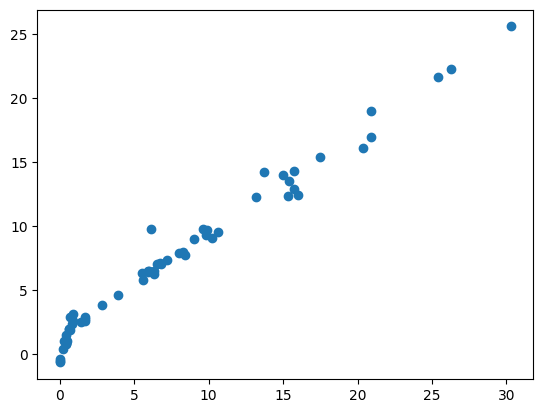

In [73]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Ridge Regression model

Mean absolute error 0.6864171979933394
R2 Score 0.9830258655702742


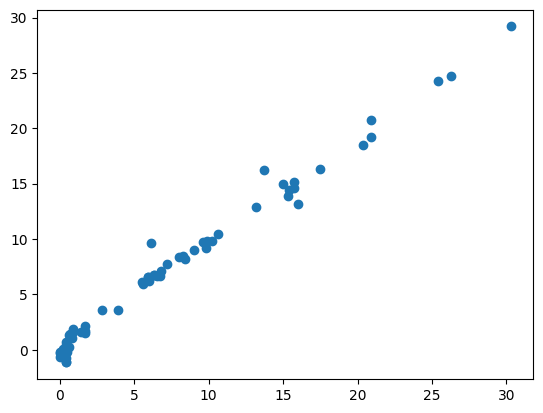

In [74]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)